In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
len(X_train)

60000

In [22]:
len(X_test)

10000

In [23]:
X_train = X_train /255
X_test = X_test / 255

In [24]:
X_train[0].shape

(28, 28)

In [25]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

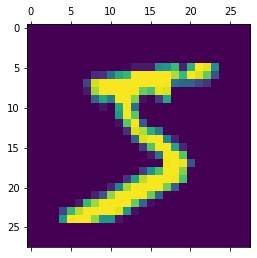

In [26]:
plt.matshow(X_train[0])

In [27]:
y_train[2]

4

In [28]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_train_flat.shape
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
)
model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.4764 - accuracy: 0.8741
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2839 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2738 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9256


In [36]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2663 - accuracy: 0.9257


[0.26630955934524536, 0.9257000088691711]

In [37]:
model.predict(X_test_flat)

array([[2.5483340e-02, 4.2637978e-07, 6.3375920e-02, ..., 9.9973345e-01,
        1.0812351e-01, 7.3132521e-01],
       [5.6416333e-01, 5.2522719e-03, 9.9958867e-01, ..., 1.4636725e-12,
        1.7455640e-01, 3.1913969e-09],
       [4.6876073e-04, 9.9332905e-01, 6.2301427e-01, ..., 1.3377839e-01,
        2.9673934e-01, 4.5472324e-02],
       ...,
       [5.1978031e-06, 6.7212636e-06, 1.1813343e-03, ..., 2.3272386e-01,
        5.4180741e-01, 8.5998821e-01],
       [1.4021993e-04, 2.5501847e-04, 1.9848347e-04, ..., 3.3242839e-05,
        6.6612828e-01, 1.7836690e-04],
       [7.2188377e-03, 2.8827951e-10, 2.9123929e-01, ..., 2.0958426e-08,
        2.4887919e-04, 7.1097298e-07]], dtype=float32)

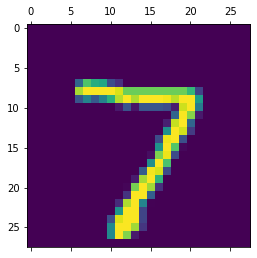

In [38]:
plt.matshow(X_test[0])

In [42]:
y_predict = model.predict(X_test_flat)
y_predict[1]

array([5.6416333e-01, 5.2522719e-03, 9.9958867e-01, 4.9730420e-01,
       7.1919481e-10, 8.9290118e-01, 9.4525951e-01, 1.4636725e-12,
       1.7455640e-01, 3.1913969e-09], dtype=float32)

In [43]:
np.argmax(y_predict[1])

2

In [46]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [50]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    3,    0,    5,    8,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  928,   18,    7,    5,   13,   10,   34,    5],
       [   4,    0,   18,  925,    0,   26,    3,   10,   14,   10],
       [   1,    2,    6,    2,  904,    0,   11,    4,    7,   45],
       [   9,    3,    3,   31,    7,  782,   17,    5,   28,    7],
       [   8,    3,    3,    2,    7,   12,  920,    2,    1,    0],
       [   1,    7,   21,    7,    7,    1,    0,  938,    2,   44],
       [   6,   12,    7,   33,    9,   27,   10,    9,  848,   13],
       [  10,    7,    2,   11,   17,    7,    0,   15,    5,  935]])>

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
)
model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 992us/step - loss: 0.2702 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 2s 978us/step - loss: 0.1233 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0863 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0514 - accuracy: 0.9846


In [54]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9736


[0.08146362006664276, 0.9735999703407288]